<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,SelectFpr,f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =  pd.read_csv("/content/audit_risk.csv")

In [ ]:
index_list = []
num1 = df.index[df['LOCATION_ID'] == 'NUH'].to_list()
num2 = df.index[df['LOCATION_ID'] == 'LOHARU'].to_list()
num3 = df.index[df['LOCATION_ID'] == 'SAFIDON'].to_list()
index_list.append(num1)
index_list.append(num2)
index_list.append(num3)

In [ ]:
final_list = []
for _list in index_list:
  for element in _list:
    final_list.append(element)

final_list

df1 = df.drop(final_list,axis =0)

In [ ]:
df1['LOCATION_ID'].value_counts()

8     76
19    68
9     53
16    52
12    47
5     44
2     41
4     37
13    35
15    35
6     33
32    29
11    26
22    24
29    21
14    20
18    16
31    12
1     11
37    10
39     9
28     8
27     8
21     8
43     7
25     6
20     5
7      4
36     4
30     4
38     4
3      3
40     3
35     2
44     1
42     1
23     1
41     1
34     1
33     1
24     1
17     1
Name: LOCATION_ID, dtype: int64

In [ ]:
df_new = df1.dropna(axis=0)

In [ ]:
X = df_new.drop(['Risk'],axis =1)
y = df_new['Risk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

array([3.550e+03, 1.987e+01, 1.450e+03, 2.540e+01, 9.972e+02, 1.179e+04,
       2.863e+01, 7.149e+03, 1.305e+04, 1.012e+00, 2.788e+00, 2.263e+01,
       1.594e+04, 3.204e+01, 9.610e+03, 7.568e+01, 1.647e-01, 2.121e+01,
       1.190e+02, 1.468e+00, 6.169e+01, 1.298e+02, 1.660e+04, 4.612e+01,
       3.460e-30, 7.556e+03])

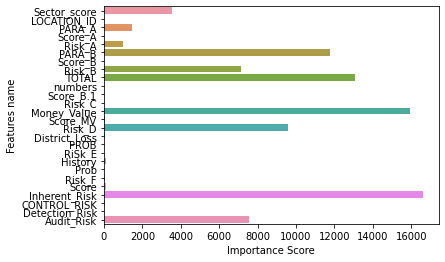

In [ ]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_
sns.barplot(x  = score,y = X.columns )
plt.xlabel('Importance Score')
plt.ylabel('Features name')
score

In [ ]:
dc = {'Chi2 ranking': X.columns[score.argsort()[::-1]]}
ranking_chi = pd.DataFrame(data =  dc)
ranking_chi

,Chi2 ranking
0,Inherent_Risk
1,Money_Value
2,TOTAL
3,PARA_B
4,Risk_D
5,Audit_Risk
6,Risk_B
7,Sector_score
8,PARA_A
9,Risk_A


In [ ]:
ranking_chi.to_excel("audit_dataset.xlsx",sheet_name='Chi_2')  

In [ ]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)
rf.feature_importances_

array([1.285e-03, 2.679e-03, 1.817e-02, 6.417e-03, 1.984e-02, 2.325e-02,
       1.511e-02, 2.003e-02, 7.057e-02, 0.000e+00, 4.844e-05, 1.861e-04,
       5.829e-02, 1.218e-02, 4.920e-02, 1.906e-02, 3.534e-04, 2.583e-02,
       0.000e+00, 1.185e-04, 1.008e-04, 1.217e-01, 2.035e-01, 3.663e-02,
       0.000e+00, 2.955e-01])

Text(0.5, 0, 'Feature Importance')

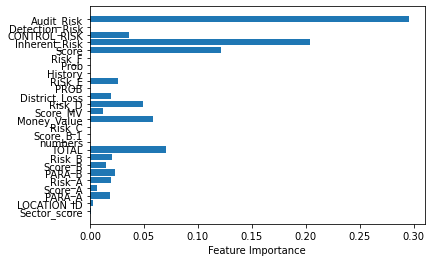

In [ ]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [ ]:
dc = {'Tree based method Attributes': X.columns[rf.feature_importances_.argsort()[::-1]] }
rank_tree = pd.DataFrame(data =  dc) 
rank_tree

,Tree based method Attributes
0,Audit_Risk
1,Inherent_Risk
2,Score
3,TOTAL
4,Money_Value
5,Risk_D
6,CONTROL_RISK
7,RiSk_E
8,PARA_B
9,Risk_B


In [ ]:
from openpyxl import load_workbook
book = load_workbook('/content/audit_dataset.xlsx')
writer = pd.ExcelWriter('/content/audit_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_tree.to_excel(writer, "Tree_based_method")
writer.save()

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

In [ ]:
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)

Text(0.5, 0, 'Feature Importance MEAN')

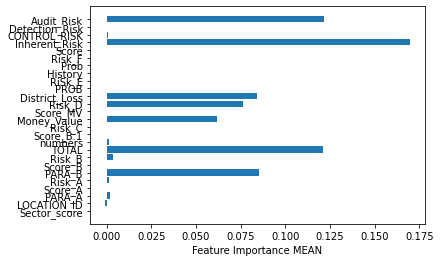

In [ ]:
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

In [ ]:
dc = {'Permutation_importance_mean': X.columns[result.importances_mean.argsort()[::-1]]}
rank_per_mean = pd.DataFrame(data =  dc) 
rank_per_mean

,Permutation_importance_mean
0,Inherent_Risk
1,Audit_Risk
2,TOTAL
3,PARA_B
4,District_Loss
5,Risk_D
6,Money_Value
7,Risk_B
8,PARA_A
9,numbers


In [ ]:
book = load_workbook('/content/audit_dataset.xlsx')
writer = pd.ExcelWriter('/content/audit_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_mean.to_excel(writer, "permutation_method_mean")
writer.save()

Text(0.5, 0, 'Feature Importance STD')

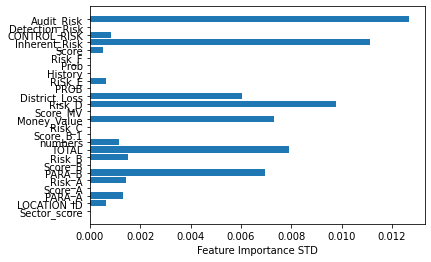

In [ ]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

In [ ]:
dc = {'Permutation_importance_std': X.columns[result.importances_std.argsort()[::-1]]}
rank_per_std = pd.DataFrame(data =  dc) 
rank_per_std

,Permutation_importance_std
0,Audit_Risk
1,Inherent_Risk
2,Risk_D
3,TOTAL
4,Money_Value
5,PARA_B
6,District_Loss
7,Risk_B
8,Risk_A
9,PARA_A


In [ ]:
book = load_workbook('/content/audit_dataset.xlsx')
writer = pd.ExcelWriter('/content/audit_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_std.to_excel(writer, "permutation_method_std")
writer.save()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
Scaler =  StandardScaler()
df_scaled =  Scaler.fit_transform(X)

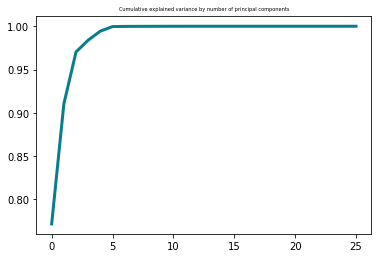

In [ ]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
Sector_score,-4.427700,8.983553,22.135330,-0.263678,-0.072790,0.231089,0.006673,-0.001182,0.002903,-0.002435,...,0.000093,-0.000004,0.000001,0.000001,5.319816e-07,-1.572376e-07,2.602503e-08,-7.480432e-32,-0.000000e+00,0.0
LOCATION_ID,-0.400037,-1.983978,0.181319,-5.626470,8.179316,0.179845,0.009308,0.002787,0.000674,0.003482,...,-0.000018,-0.000042,-0.000014,-0.000002,-7.440201e-07,1.457153e-06,2.351826e-07,-1.770090e-31,6.217703e-32,0.0
PARA_A,3.855092,-0.941014,-0.344378,-0.119223,-0.273470,4.743580,-0.065651,0.002569,-0.107351,-0.009550,...,0.008028,-0.005693,0.003820,-0.000176,1.834503e-04,-1.416721e-05,4.117782e-07,-4.489253e-30,-4.331564e-30,0.0
Score_A,0.057545,-0.080228,-0.040328,0.010531,0.011017,0.046115,-0.001160,-0.015992,0.031352,-0.059469,...,0.023529,-0.003178,0.000029,0.003249,-9.695742e-04,-1.131046e-03,5.094189e-04,-1.716971e-15,1.048293e-17,0.0
Risk_A,2.336517,-0.590572,-0.209444,-0.068890,-0.153999,2.864092,-0.038457,-0.012012,-0.058767,-0.007214,...,-0.011005,0.019678,-0.026984,0.003045,1.187563e-04,4.579202e-05,-1.421516e-06,7.269984e-30,6.484063e-30,0.0


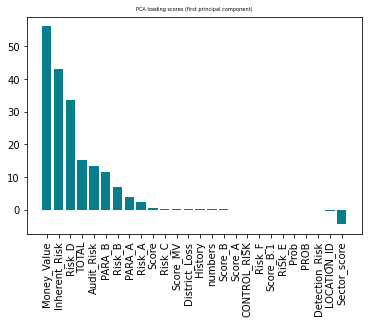

In [ ]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
rank_pca = pd.DataFrame(loadings['PC1'])
rank_pca =  rank_pca.sort_values(by='PC1', ascending = False)
rank_pca

,PC1
Money_Value,56.096846
Inherent_Risk,43.117840
Risk_D,33.676343
TOTAL,15.145095
Audit_Risk,13.250400
PARA_B,11.505678
Risk_B,6.913754
PARA_A,3.855092
Risk_A,2.336517
Score,0.398457


In [ ]:
book = load_workbook('/content/audit_dataset.xlsx')
writer = pd.ExcelWriter('/content/audit_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_pca.to_excel(writer, "PCA")
writer.save()

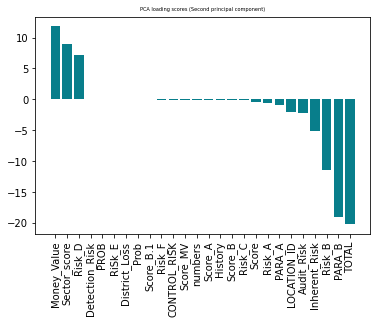

In [ ]:
pc2_loadings = loadings.sort_values(by='PC2', ascending=False)[['PC2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc2_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC2'], color='#087E8B')
plt.title('PCA loading scores (Second principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([21, 13,  6,  3,  8,  5,  7, 23, 22, 17,  0, 15, 25,  4,  2, 10, 11,
        9, 19, 12, 14, 18, 20, 16,  1, 24])

In [ ]:
best_features_fscore = df.columns[fs_indices_fscore].values
best_features_fscore

array(['Score', 'Score_MV', 'Score_B', 'Score_A', 'TOTAL', 'PARA_B',
       'Risk_B', 'CONTROL_RISK', 'Inherent_Risk', 'RiSk_E',
       'Sector_score', 'District_Loss', 'Audit_Risk', 'Risk_A', 'PARA_A',
       'Score_B.1', 'Risk_C', 'numbers', 'Prob', 'Money_Value', 'Risk_D',
       'History', 'Risk_F', 'PROB', 'LOCATION_ID', 'Detection_Risk'],
      dtype=object)

In [ ]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([1073.099,  576.973,  487.794,  378.601,  251.583,  211.281,
        205.282,  128.048,  125.992,  118.595,  116.549,  110.766,
        109.603,  105.16 ,  101.069,   87.819,   80.945,   61.748,
         59.591,   49.097,   47.992,   32.912,   24.88 ,   17.798,
          4.275,      nan])

Text(0, 0.5, 'Features')

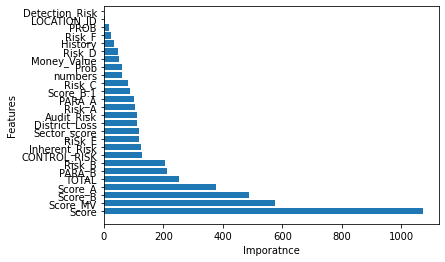

In [ ]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [ ]:
rank_f_test = pd.DataFrame(best_features_fscore, columns = ['F_test_rank']) 
rank_f_test

,F_test_rank
0,Score
1,Score_MV
2,Score_B
3,Score_A
4,TOTAL
5,PARA_B
6,Risk_B
7,CONTROL_RISK
8,Inherent_Risk
9,RiSk_E


In [ ]:
book = load_workbook('/content/audit_dataset.xlsx')
writer = pd.ExcelWriter('/content/audit_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_f_test.to_excel(writer, "F_test")
writer.save()

In [ ]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['Audit_Risk', 'Inherent_Risk', 'Score', 'TOTAL', 'Risk_B',
       'Risk_D', 'PARA_B', 'Money_Value', 'Score_MV', 'Score_B', 'Risk_A',
       'PARA_A', 'Score_A', 'CONTROL_RISK', 'Sector_score', 'Score_B.1',
       'RiSk_E', 'Prob', 'Risk_C', 'District_Loss', 'numbers', 'Risk_F',
       'History', 'PROB', 'LOCATION_ID', 'Detection_Risk'], dtype=object)

In [ ]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.666, 0.567, 0.467, 0.35 , 0.307, 0.301, 0.295, 0.294, 0.282,
       0.271, 0.248, 0.244, 0.205, 0.166, 0.103, 0.091, 0.078, 0.076,
       0.074, 0.069, 0.063, 0.059, 0.057, 0.05 , 0.011, 0.   ])

Text(0, 0.5, 'Features')

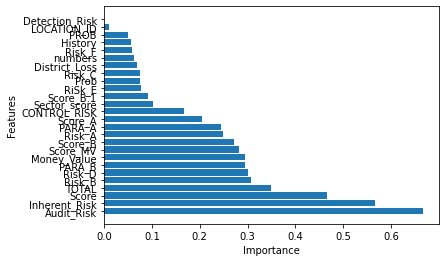

In [ ]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [ ]:
rank_mutual = pd.DataFrame(best_features_mutual_info,columns = ['Mutual_Info_rank'])
rank_mutual

,Mutual_Info_rank
0,Audit_Risk
1,Inherent_Risk
2,Score
3,TOTAL
4,Risk_B
5,Risk_D
6,PARA_B
7,Money_Value
8,Score_MV
9,Score_B


In [ ]:
book = load_workbook('/content/audit_dataset.xlsx')
writer = pd.ExcelWriter('/content/audit_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_mutual.to_excel(writer, "mutual_info")
writer.save()

In [ ]:
df_new['Risk'] = LabelEncoder().fit_transform(df_new['Risk'])
df_corr = df_new.corr()
df_corr.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.217724,-0.427975,-0.219995,-0.133234,-0.220443,-0.131142,-0.153966,-0.152502,-0.171165,...,-0.129340,-0.115293,-0.137511,-0.103665,-0.339585,-0.174041,-0.155790,NaN,-0.092368,-0.396591
PARA_A,-0.217724,1.000000,0.496187,0.999267,0.161610,0.357831,0.161512,0.266706,0.133373,0.140172,...,0.118261,0.117962,0.172257,0.103694,0.426005,0.481577,0.148577,NaN,0.219518,0.378008
Score_A,-0.427975,0.496187,1.000000,0.504378,0.248984,0.571429,0.247752,0.297051,0.242054,0.273863,...,0.101070,0.177411,0.264772,0.150441,0.719458,0.320291,0.169519,NaN,0.201458,0.618348
Risk_A,-0.219995,0.999267,0.504378,1.000000,0.164952,0.362238,0.164816,0.269882,0.135192,0.142619,...,0.117947,0.120810,0.175776,0.106271,0.431838,0.483005,0.150144,NaN,0.221337,0.384304
PARA_B,-0.133234,0.161610,0.248984,0.164952,1.000000,0.347265,0.999936,0.994102,0.209630,0.230601,...,0.078979,0.203407,0.316353,0.195892,0.396977,0.654349,0.186370,NaN,0.887775,0.256591


In [ ]:
corr_rank = pd.DataFrame(df_corr['Risk'])
corr_rank = corr_rank.sort_values(by = 'Risk',ascending = False)
corr_rank

,Risk
Risk,1.000000
Score,0.785263
Score_MV,0.687724
Score_B,0.634784
Score_A,0.618348
CONTROL_RISK,0.415713
RiSk_E,0.410961
District_Loss,0.402943
Risk_A,0.384304
PARA_A,0.378008


In [ ]:
book = load_workbook('/content/audit_dataset.xlsx')
writer = pd.ExcelWriter('/content/audit_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
corr_rank.to_excel(writer, "Pearson_Correlation")
writer.save()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

In [ ]:
estimator = LinearSVC()

In [ ]:
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)

In [ ]:
index = selector.ranking_.argsort()
index

array([25,  9, 14, 15,  8, 23, 22, 11,  7,  5, 17,  3,  4,  6, 24, 10, 19,
       16, 13,  1, 12,  2, 21,  0, 18, 20])

In [ ]:
X.columns[index]

Index(['Audit_Risk', 'numbers', 'Risk_D', 'District_Loss', 'TOTAL',
       'CONTROL_RISK', 'Inherent_Risk', 'Risk_C', 'Risk_B', 'PARA_B', 'RiSk_E',
       'Score_A', 'Risk_A', 'Score_B', 'Detection_Risk', 'Score_B.1', 'Prob',
       'PROB', 'Score_MV', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'Score',
       'Sector_score', 'History', 'Risk_F'],
      dtype='object')

In [ ]:
dc = {'Rank_RFE': X.columns[index]}
rank_RFE = pd.DataFrame(data =  dc) 
rank_RFE

,Rank_RFE
0,Audit_Risk
1,numbers
2,Risk_D
3,District_Loss
4,TOTAL
5,CONTROL_RISK
6,Inherent_Risk
7,Risk_C
8,Risk_B
9,PARA_B


In [ ]:
book = load_workbook('/content/audit_dataset.xlsx')
writer = pd.ExcelWriter('/content/audit_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_RFE.to_excel(writer, "RFE")
writer.save()